In [86]:
# Import following libraries.

import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

In [87]:
# Load the data.

data =  pd.read_html('Agmarknet_Price_Report.xls')
data

[      Sl no. District Name Market Name Commodity Variety Grade  \
 0          1          Agra     Achnera    Potato    Desi   FAQ   
 1          2          Agra     Achnera    Potato    Desi   FAQ   
 2          3          Agra     Achnera    Potato    Desi   FAQ   
 3          4          Agra     Achnera    Potato    Desi   FAQ   
 4          5          Agra     Achnera    Potato    Desi   FAQ   
 ...      ...           ...         ...       ...     ...   ...   
 1822    1823          Agra    Samsabad    Potato   Local   FAQ   
 1823    1824          Agra    Samsabad    Potato   Local   FAQ   
 1824    1825          Agra    Samsabad    Potato   Local   FAQ   
 1825    1826          Agra    Samsabad    Potato   Local   FAQ   
 1826    1827          Agra    Samsabad    Potato   Local   FAQ   
 
       Min Price (Rs./Quintal)  Max Price (Rs./Quintal)  \
 0                         900                     1000   
 1                         800                      900   
 2               

In [88]:
# Convert data to dataframe.

price = data[0]
price

,Sl no.,District Name,Market Name,Commodity,Variety,Grade,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Price Date
0,1,Agra,Achnera,Potato,Desi,FAQ,900,1000,950,30 Dec 2020
1,2,Agra,Achnera,Potato,Desi,FAQ,800,900,850,29 Dec 2020
2,3,Agra,Achnera,Potato,Desi,FAQ,850,950,900,28 Dec 2020
3,4,Agra,Achnera,Potato,Desi,FAQ,800,900,850,27 Dec 2020
4,5,Agra,Achnera,Potato,Desi,FAQ,800,900,850,26 Dec 2020
...,...,...,...,...,...,...,...,...,...,...
1822,1823,Agra,Samsabad,Potato,Local,FAQ,1000,1200,1100,06 Jan 2020
1823,1824,Agra,Samsabad,Potato,Local,FAQ,1000,1200,1100,05 Jan 2020
1824,1825,Agra,Samsabad,Potato,Local,FAQ,1100,1300,1200,04 Jan 2020
1825,1826,Agra,Samsabad,Potato,Local,FAQ,1100,1300,1200,02 Jan 2020


In [89]:
# Check each column for the presence of missing values.

price.isnull().sum()

# No missing values.

Sl no.                       0
District Name                0
Market Name                  0
Commodity                    0
Variety                      0
Grade                        0
Min Price (Rs./Quintal)      0
Max Price (Rs./Quintal)      0
Modal Price (Rs./Quintal)    0
Price Date                   0
dtype: int64

In [90]:
# Understand data types of all columns.

price.dtypes

Sl no.                        int64
District Name                object
Market Name                  object
Commodity                    object
Variety                      object
Grade                        object
Min Price (Rs./Quintal)       int64
Max Price (Rs./Quintal)       int64
Modal Price (Rs./Quintal)     int64
Price Date                   object
dtype: object

{'whiskers': [<matplotlib.lines.Line2D at 0x7f3ef92a2a90>,
 'caps': [<matplotlib.lines.Line2D at 0x7f3ef9288350>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f3ef92a2690>],
 'medians': [<matplotlib.lines.Line2D at 0x7f3ef9288c10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f3ef92b3090>],
 'means': []}

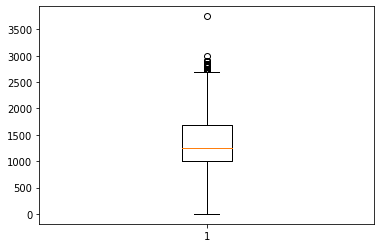

In [91]:
# Check if there are outliers in 'Min Price (Rs./Quintal)'.

plt.boxplot(price['Min Price (Rs./Quintal)'])

# There are outliers.

{'whiskers': [<matplotlib.lines.Line2D at 0x7f3ef9218710>,
 'caps': [<matplotlib.lines.Line2D at 0x7f3ef91ffe50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f3ef9218d50>],
 'medians': [<matplotlib.lines.Line2D at 0x7f3ef91ff8d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f3ef91ff350>],
 'means': []}

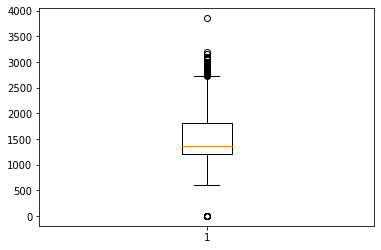

In [92]:
# Check if there are outliers in 'Max Price (Rs./Quintal)'.

plt.boxplot(price['Max Price (Rs./Quintal)'])

# There are outliers.

{'whiskers': [<matplotlib.lines.Line2D at 0x7f3ef993ba90>,
 'caps': [<matplotlib.lines.Line2D at 0x7f3ef993b150>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f3ef993bc10>],
 'medians': [<matplotlib.lines.Line2D at 0x7f3ef995c8d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f3ef995c450>],
 'means': []}

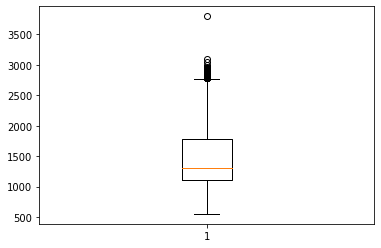

In [93]:
# Check if there are outliers in 'Modal Price (Rs./Quintal)'.

plt.boxplot(price['Modal Price (Rs./Quintal)'])

# There are outliers.

In [94]:
## Outlier treatment for 'Min Price (Rs./Quintal)'.

# Calculate quantiles and Inter quartile range (IQR) and cap outliers with value of upper cap.

Q1 = price['Min Price (Rs./Quintal)'].quantile(0.25)
Q3 = price['Min Price (Rs./Quintal)'].quantile(0.75)
IQR = Q3 - Q1 
Lower_cap  = Q1-1.5*IQR
Upper_cap = Q3+1.5*IQR
print(Upper_cap)

2725.0


In [95]:
# Cap outliers with value of upper cap.

price.loc[price['Min Price (Rs./Quintal)'] >= 2725.0, 'Min Price (Rs./Quintal)'] = 2725.0

In [96]:
## Outlier treatment for 'Max Price (Rs./Quintal)'.

Q1 = price['Max Price (Rs./Quintal)'].quantile(0.25)
Q3 = price['Max Price (Rs./Quintal)'].quantile(0.75)
IQR = Q3 - Q1 
Lower_cap  = Q1-1.5*IQR
Upper_cap = Q3+1.5*IQR
print(Upper_cap)
print(Lower_cap)

2725.0
285.0


In [97]:
# Cap outliers with value of upper cap and lower cap.

price.loc[price['Max Price (Rs./Quintal)'] >= 2725.0, 'Max Price (Rs./Quintal)'] = 2725.0

price.loc[price['Max Price (Rs./Quintal)'] <= 285.0, 'Max Price (Rs./Quintal)'] = 285.0

In [98]:
## Outlier treatment for 'Modal Price (Rs./Quintal)'.

Q1 = price['Modal Price (Rs./Quintal)'].quantile(0.25)
Q3 = price['Modal Price (Rs./Quintal)'].quantile(0.75)
IQR = Q3 - Q1 
Lower_cap  = Q1-1.5*IQR
Upper_cap = Q3+1.5*IQR
print(Upper_cap)

2777.5


In [99]:
# Cap outliers with value of upper cap.

price.loc[price['Modal Price (Rs./Quintal)'] >= 2777.5, 'Modal Price (Rs./Quintal)'] = 2777.5


{'whiskers': [<matplotlib.lines.Line2D at 0x7f3ef9944190>,
 'caps': [<matplotlib.lines.Line2D at 0x7f3ef96a7ad0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f3ef9944750>],
 'medians': [<matplotlib.lines.Line2D at 0x7f3ef96a7050>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f3ef96b3f50>],
 'means': []}

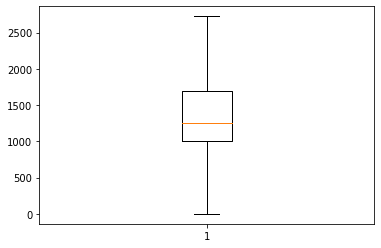

In [100]:
## Again check for outliers after outlier treatment in column "Min Price (Rs./Quintal)"

plt.boxplot(price['Min Price (Rs./Quintal)'])

# No outliers.

{'whiskers': [<matplotlib.lines.Line2D at 0x7f3ef96a6bd0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f3ef99d7a90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f3ef96a6950>],
 'medians': [<matplotlib.lines.Line2D at 0x7f3ef99d7490>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f3ef991a5d0>],
 'means': []}

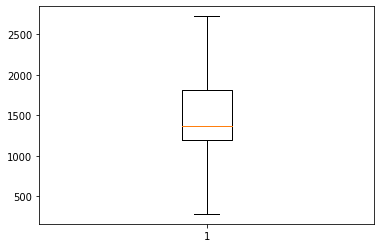

In [101]:
## Again check for outliers after outlier treatment in column "Max Price (Rs./Quintal)"

plt.boxplot(price['Max Price (Rs./Quintal)'])

# No outliers.

{'whiskers': [<matplotlib.lines.Line2D at 0x7f3ef9971150>,
 'caps': [<matplotlib.lines.Line2D at 0x7f3ef993c490>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f3ef9971a90>],
 'medians': [<matplotlib.lines.Line2D at 0x7f3ef993c710>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f3ef9932190>],
 'means': []}

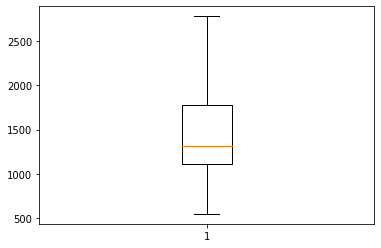

In [102]:
## Again check for outliers after outlier treatment in column "Modal Price (Rs./Quintal)"

plt.boxplot(price['Modal Price (Rs./Quintal)'])

# No outliers.

In [103]:
# Convert Price Date to datetime object.

price['Price Date'] = pd.to_datetime(price['Price Date'])

In [104]:
# Q1. Display records between Jan 2020 to Dec 2020.

# Arrange 'Price Date' in ascending order to get records between Jan 2020 to Dec 2020.

price_by_date = price.sort_values(by = "Price Date")
price_by_date

,Sl no.,District Name,Market Name,Commodity,Variety,Grade,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Price Date
1826,1827,Agra,Samsabad,Potato,Local,FAQ,1100,1300,1200.0,2020-01-01
305,306,Agra,Achnera,Potato,Desi,FAQ,1300,1400,1350.0,2020-01-01
1325,1326,Agra,Jagnair,Potato,Desi,FAQ,1250,1350,1300.0,2020-01-01
1658,1659,Agra,Khairagarh,Potato,Desi,FAQ,1200,1300,1250.0,2020-01-01
1138,1139,Agra,Fatehpur Sikri,Potato,Local,FAQ,1400,1520,1455.0,2020-01-01
...,...,...,...,...,...,...,...,...,...,...
1472,1473,Agra,Khairagarh,Potato,Desi,FAQ,1100,1200,1150.0,2020-12-31
591,592,Agra,Fatehabad,Potato,Desi,FAQ,700,800,750.0,2020-12-31
306,307,Agra,Agra,Potato,Desi,FAQ,800,1100,960.0,2020-12-31
849,850,Agra,Fatehpur Sikri,Potato,Local,FAQ,900,1100,1015.0,2020-12-31


In [105]:
## Q2. Identify major markets for district Agra.

# To identify major markets groupby "Market Name" and find out sum of "Modal price" for every market.

price_per_market = price.groupby(['Market Name'])['Modal Price (Rs./Quintal)'].sum().reset_index()
price_per_market

,Market Name,Modal Price (Rs./Quintal)
0,Achnera,515942.5
1,Agra,486600.0
2,Fatehabad,357430.0
3,Fatehpur Sikri,501370.0
4,Jagnair,244967.5
5,Jarar,156610.0
6,Khairagarh,230065.0
7,Samsabad,191775.0


In [106]:
# To find out percentage price for every market, calculate total_price.

total_price = sum(price['Modal Price (Rs./Quintal)'])
total_price

2684760.0

In [107]:
# Store price percentage in list "percentage".

percentage = []

pct = (price_per_market['Modal Price (Rs./Quintal)']/ total_price) * 100

percentage.append(round(pct, 2))

In [108]:
# Covert "percentage" to daaframe.

percentage = pd.DataFrame(percentage)
percentage

,0,1,2,3,4,5,6,7
Modal Price (Rs./Quintal),19.22,18.12,13.31,18.67,9.12,5.83,8.57,7.14


In [109]:
# Apply transpose to "percentage" and store it as "price_df".

price_df = percentage.transpose()
price_df

,Modal Price (Rs./Quintal)
0,19.22
1,18.12
2,13.31
3,18.67
4,9.12
5,5.83
6,8.57
7,7.14


In [110]:
# Rename columns of "price_df".

price_df.columns = ["Percentage"]
price_df

,Percentage
0,19.22
1,18.12
2,13.31
3,18.67
4,9.12
5,5.83
6,8.57
7,7.14


In [111]:
# Concat dataframes "price_per_market" and "price_df".

price_per_market = pd.concat([price_per_market, price_df], axis = 1)
price_per_market

,Market Name,Modal Price (Rs./Quintal),Percentage
0,Achnera,515942.5,19.22
1,Agra,486600.0,18.12
2,Fatehabad,357430.0,13.31
3,Fatehpur Sikri,501370.0,18.67
4,Jagnair,244967.5,9.12
5,Jarar,156610.0,5.83
6,Khairagarh,230065.0,8.57
7,Samsabad,191775.0,7.14


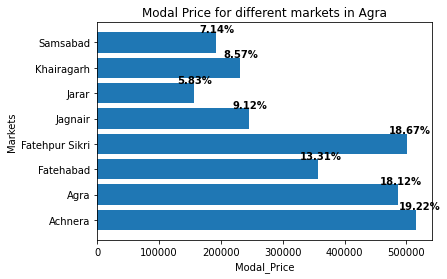

In [112]:
# Q2. Identify major markets for district Agra and plot price patterns for each of them.

plt.title("Modal Price for different markets in Agra")
plt.xlabel("Modal_Price")
plt.ylabel("Markets")

plot = plt.barh(price_per_market['Market Name'], price_per_market['Modal Price (Rs./Quintal)'])
i = 0
for p in plot:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
      
    plt.text(x+width*1.01,
             y+height*1.01,
             str(price_per_market.Percentage[i]) + '%',
             ha = 'center',
             weight = 'bold')
    i += 1
plt.show()

# Major markets are Achnera, Agra and Fatehpur Sikri because price in these markets is high when compared to remaining markets.